# Diamond Price Prediction
***
## Table of Contents
***


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from numpy.typing import NDArray
from pandas.api.types import is_numeric_dtype

## 1. Introduction
Diamond is 58 times harder than any other mineral in the world, and its elegance as a gemstone has long been admired. The diamond industry relies heavily on accurate and objective valuation, as prices are determined by a combination of physical and qualitative attributes. By applying machine learning algorithms, we can estimate diamond prices more effectively, thereby supporting jewellers, investors, and consumers in making informed decisions.

The objective of this project is to develop and compare multiple predictive models to accurately estimate the price of diamonds based on their features, providing actionable insights for stakeholders, jewellers, and clients in the diamond industry.

## 2. Loading Data
Retrieved from [Kaggle - Diamonds](https://www.kaggle.com/datasets/shivam2503/diamonds)
- **price**: Price in US dollars ($326 - $18,823). Target variable.
- **carat**: Weight of the diamond (0.2 - 5.01)
- **cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color**: Diamond colour, from J (worst) to D (best)
- **clarity**: Measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x**: Length in mm (0 - 10.74)
- **y**: Width in mm (0 - 58.9)
- **z**: Depth in mm (0 - 31.8)
- **depth**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)
- **table**: Width of top of diamond relative to widest point (43-95)

In [48]:
df = pd.read_csv("_datasets/diamonds.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [49]:
df.shape

(53940, 10)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## 3. Exploratory Data Analysis

In [ ]:
def plot_distributions(df: pd.DataFrame) -> None:
    n_cols = df.shape[1]
    fig, axes = plt.subplots(3, 4, figsize=(20, 12))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        ax = axes[i]
        if is_numeric_dtype(df[col]):
            sns.histplot(df[col], kde=True, ax=ax, edgecolor="black")
            ax.set_title(f"Distribution of {col}")
        else:
            sns.countplot(
                data=df,
                x=col,
                ax=ax,
                hue=col,
                palette="Set2",
                edgecolor="black",
                order=df[col].value_counts(ascending=True).index,
            )
            ax.set_title(f"Count of {col}")

    if n_cols < len(axes):
        for j in range(n_cols, len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object', name='cut')
Index(['G', 'E', 'F', 'H', 'D', 'I', 'J'], dtype='object', name='color')
Index(['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'], dtype='object', name='clarity')


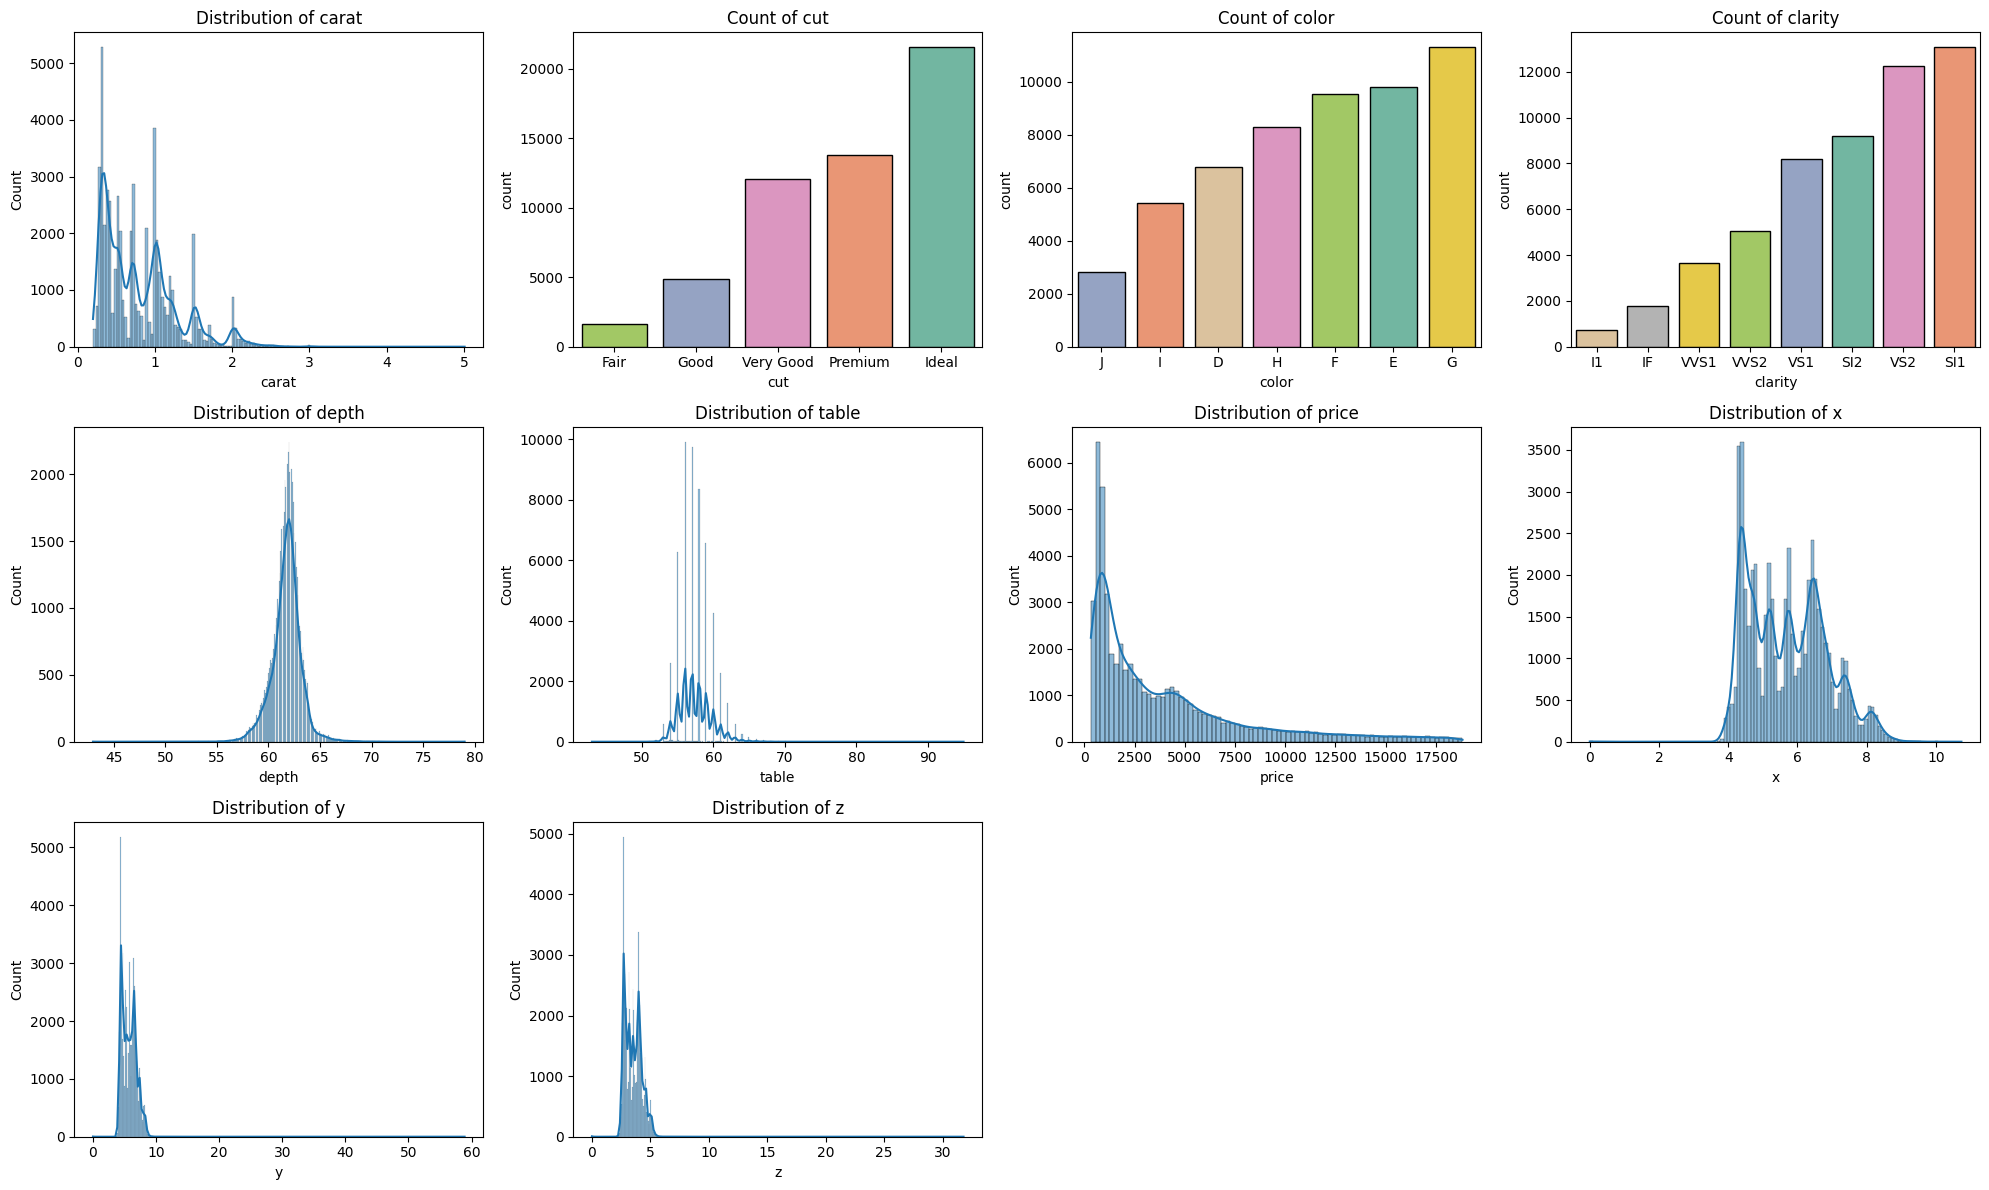

In [54]:
plot_distributions(df)

Analysing the feature distributions, several key insights have been revealed:
- The **carat** distribution is right-skewed, meaning that the most diamonds have a low carat weight. Some diamonds are significantly heavier, but they are rare.
- The `Ideal` **cut** is the most common, followed by `Premium` and `Very Good`. This indicates a preference for higher quality cuts in the dataset.
- Diamonds with **colour** grades `G`, `E`, `H` and `F` are more prevalent, while `J` and `D` are less common. Thus most diamonds fall into the middle colour range.
- Most diamonds fall into the middle **clarity** range, with extremes (`I1` and `IF`) being rare.
- Both **depth** and **table** are approximately normally distributed.
- The **price** distribution is highly right-skewed. Most diamonds are priced at the lower end, with a long tail extending to very high prices. This skewness is typical in luxury goods, where a few exceptional items command premium prices. 
- The length (**x**), width (**y**) and depth (**z**) are also right-skewed, with most values clustered at lower ranges.

## 4. Data Preprocessing

## References

1. Omondi, Evans (2023). *Assessing predictive performance of supervised machine learning algorithms for a diamond pricing model [Dataset]*. Dryad. <br>
https://doi.org/10.5061/dryad.wh70rxwrh

1. Shivam Agrawal. (2017). *Diamonds*.<br>
https://www.kaggle.com/datasets/shivam2503/diamonds